$
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
%
\newcommand{\ket}[1]{\left\vert #1 \right\rangle}
\newcommand{\bra}[1]{\left\langle #1 \right\vert}
\newcommand{\braket}[1]{\left\langle #1 \right\rangle}
\newcommand{\pmat}[1]{\begin{pmatrix}#1\end{pmatrix}}
$

---

***This notebook is part of the project [SEQUOIA](https://websites.fraunhofer.de/sequoia/) of the [Competence Center Quantum Computing Baden-Württemberg](https://www.iaf.fraunhofer.de/en/networkers/KQC.html).***

---

<img src="images/sequoia_logo.png" />

<br>
<br>

# SEQUOIA DEMONSTRATOR  <a class="tocSkip"/>

## Energy Use Case: Optimization of Charging Schedules for Electric Cars  <a class="tocSkip"/>


***Author: Dr. Andreas Sturm, Fraunhofer IAO, andreas.sturm@iao.fraunhofer.de***

---
# Notebook 1 <a class="tocSkip"/>
---

# Real World Problem

The project **LamA - Laden am Arbeitsplatz** (english: charging at work) is a joint project led by Fraunhofer IAO and funded by the federal government of Germany as part of the “Clean Air 2017-2020” immediate action programme. Among others the goal is to build up charging infrastructure for electric vehicles at 37 institutes of the Fraunhofer society across Germany. (See futher [link1](https://www.lama.zone/), [link2](https://www.iao.fraunhofer.de/de/forschung/smart-energy-and-mobility-solutions/lama-laden-am-arbeitsplatz.html), [link3](https://www.ieg.fraunhofer.de/en/references/lama.html)).

In this demonstrator we aim to provide an optimal charging schedule for this charging infrastructure. Clearly, such an optimization can be implemented with respect to different aspects, e.g. by involving weather predictions we could optimize the schedule such that as much clean energy (sun, wind, etc.) as possible is used. Or, considering that the price of energy from the public electricity grid varies over time and the electric vehicles are charged during working hours, i.e. around a fairly long period of about 8 hours, we could optimize the schedule such that it takes energy from the grid when it is the cheapest. Having in mind that quantum computing is currently in the NISQ (noisy intermediate scale quantum) era we decided to consider the aspect of **minimizing the peak load** that is taken from the electricity grid. This reduces costs, relieves the public electricity grid and - as we will see - can be reduced to a meaningful proof of concept problem that can be executed on todays available quantum computers.

# Proof of Concept (POC) Model

Let us begin by introducing the POC model that we will consider in this demonstrator. It is an **optimization task** where we are **given**
- the number of cars that have to be charged,
- the arrival and departure times of these cars, and
- the required energies they need to charge.

Our **aim** is to

- minimize the peak load taken from the electricity grid,
- meet the time restrictions imposed by the arrival and departure times, and
- charge the correct amount of energies.

In order to make this optimization task feasible for a NISQ computer we make the following **simplifications**: 

- We work with discrete time slots and
- we assume that we can only charge on discrete loading levels.

Let us illustrate this rather abstract optimization task with a simple example.

## Example

We consider a charging station with 6 charging levels (i.e. levels $0$, $1$, ..., $5$) and $7$ available time slots (i.e. slots $0$, $1$, ..., $6$). Moreover, le us take two cars (named car_green and car_orange), where
- car_green is at the charging station at time slots $0$, ..., $3$ and needs to charge $8$ energy units
- car_orange is at the charging station at time slots $1$,..., $6$ and needs to charge $12$ energy units

<img src="images/notebook_1_poc_example.png" width="700" />
<br>

An optimzation process for the above situation could yield the following charging schedules:

Example 1: A non-feasible schedule (energy constraint violated)

<br>

<img src="images/notebook_1_poc_example_non_feasible.png" width=300 >

Example 2: A non-feasible schedule (time constraint violated)

<br>

<img src="images/notebook_1_poc_example_non_feasible_2.png" width=300 />

Example 3: A non-optimal schedule (peak load not as low as possible)

<br>

<img src="images/notebook_1_poc_example_non_optimal.png" width=300 />

Example 4: An optimal solution

<br>

<img src="images/notebook_1_poc_example_optimal.png" width=300 />

Our next step is to find a formal mathematical description for our POC model.

# Mathematical Description of POC Model

## Notation

In the further we use the following notation:
- $T$: number of time slots $\rightarrow$ we have time slots $0, 1, \dots, T-1$
- $L$: number of charging levels $\rightarrow$ we have charging levels $0, 1, \dots, L-1$
- $K$: number of cars $\rightarrow$ we have $k$ cars the we label as $0, 1, \dots, K-1$
- for every $k$ in $\{0, \dots, K-1\}$:
    - $t_k^a \in \{0, \dots, T-1\}$: arrival time car $k$
    - $t_k^d \in \{0, \dots, T-1\}$: departure time car $k$
    - $e_k \in \mathbb{N}$: required amount of energy car $k$
    - for every $t \in \{0, \dots, T-1\}$:
        - $p_k^t \in \{0, \dots, L-1\}$: charging level on which car $k$ charges at time slot $t$ (i.e. the amount of
energy packages it draws from the electricity grid on time slot $t$)

For a shorter notation we introduce the vectors
- $\vec{p}_k$ = $\pmat{p_k^0 \\ \vdots \\ p_k^{T-1}} \in \{0, \dots, L-1\}^T$, 
where $k \in \{0, \dots, K-1\}$
$\rightarrow$ the entries of $\vec{p}_k$ form the charging curve for car $k$
<br> <br>
- $\vec{p}$ = $\pmat{\vec{p}_0 \\ \vdots \\ \vec{p}_{K-1}} \in \{0, \dots, L-1\}^{K T}$

Moreover, we define the vector $\vec{p}_\text{sum}$ so that its $t$-th component is the sum  of all charging levels of all cars for time slot $t$:

$$
\vec{p}_\text{sum}
= \vec{p}_0 + \vec{p}_1 + \dots + \vec{p}_{K-1}
= \pmat{
    p_0^0 + p_1^0 + \dots p_{K-1}^0
    \\
    \vdots
    \\
    p_0^{T-1} + p_1^{T-1} + \dots p_{K-1}^{T-1}
}
= \bigl(\underbrace{I_T \; I_T \; \cdots \; I_T}_{K \text{ times}}\bigr) \vec{p},
\qquad
I_T = \pmat{
    1 &        &
    \\
      & \ddots &
    \\
      &        & 1}
\in \R^{T \times T} \ .
$$

With this notation at hand we can set up our cost function.

## Cost function

Note that the smaller the $\ell_2$-norm of $\vec{p}_\text{sum}$, i.e. $\|\vec{p}_\text{sum}\|_2$, the smaller the peak load. E.g.

$$
\left\| \pmat{1 \\ 2 \\ 3} \right\|_2^2
= 1^2 + 2^2 + 3^2 
= 14,
\qquad
\left\| \pmat{2 \\ 2 \\ 2} \right\|_2^2
= 2^2 + 2^2 + 2^2 
= 12.
$$

Further, note that

$$
\|\vec{p}_\text{sum}\|_2^2
= \vec{p}^{\, t} 
\underbrace{\pmat{I \\ I \\ \vdots \\ I} \pmat{I \; I \dots \; I}}_{:= A}
\vec{p},
\qquad
\text{where: }
A = \mathbb{1}_K^t \mathbb{1}_K \otimes I_T,
\ \
\mathbb{1}_K = \pmat{1 \\ 1 \\ \vdots \\ 1} \in \R^{K \times 1} \ .
$$

So, we can use the following **cost function** for the minimization of the peak load:

$$
f_1(\vec{p})
= \vec{p}^{\, t} A \vec{p}
$$

Clearly, only minimizing $f_1$ would yield $\vec{p} = (0, 0, \dots, 0)^t$, which means that no charging would take place at all. Thus, we have to incorporate constraints that enforce the charging of the correct amount of energy at correct time slots.

## Constraints

For every $k \in \{0, \dots, K-1\}$ we define

$$
C_k = \bigl( 0 \; \dots 0 \; \underbrace{1}_{t_k^a} \; 1 \dots 1 \; \underbrace{1}_{t_k^d} \; 0 \dots 0 \bigr),
$$

and collect all $C_k$ in a matrix $C$:

$$
C = 
\pmat{
    C_0 &     &        &     
    \\
        & C_2 &        &     
    \\
        &     & \ddots &     
    \\
        &     &        & C_{K-1}
} \ .
$$

Then, the **constraints** (charge at right times the right amount of energy) are given by

$$
C \vec{p} = \vec{e},
\qquad
\vec{e} = \pmat{e_0 \\ \vdots \\ e_{K-1}},
$$

where $e_k$ was the amount of energy car $k$ needs to charge (see above).

## Minimization problem
Putting all together we have a **quadratic constrained integer optimization**

$$
\begin{equation}
\left\{ \; \;
\begin{aligned}
    \min_{\vec{p} \in \{0, \dots, L-1\}^{KT}} f_1(\vec{p})
    \\[0.2cm]
    \text{such that } C \vec{p} = \vec{e}
\end{aligned}
\label{eq:qcio}
\tag{QCIO}
\right.
\end{equation}
$$

Next, we want to implement the logic of (QCIO) in **python** and **qiskit**.

# Implementation of POC Model

## Part 1: Python

First, we write a class that holds the data for a car that should be charged.

In [2]:
import os
os.environ["QISKIT_SETTINGS"] = "qiskitrc"

In [3]:
from typing import List 

class Car:
    def __init__(
        self,
        car_id: str, # an arbitrary name for the car
        time_slots_at_charging_unit: List[int], # time slots when the car is at the charging unit
        required_energy: int # energy units that should be charged
    ) -> None:
        self.car_id = car_id
        self.time_slots_at_charging_unit = time_slots_at_charging_unit
        self.required_energy = required_energy

    def __str__(self) -> str:
        return f"Car '{self.car_id}':\n" \
            f"  at charging station at time slots {self.time_slots_at_charging_unit}\n" \
            f"  requires {self.required_energy} energy units"

Next, we write a class to hold the data for a charging unit and with the possibility to register cars to charge at it. Moreover, to keep things simple we give this class the task to generate the matrices of the mathematical formulation of our POC model (see section above).

In [4]:
import numpy as np

class ChargingUnit:
    def __init__(
        self,
        charging_unit_id: str, # an arbitrary name for the charging unit
        number_charging_levels: int,
        number_time_slots: int,
    ) -> None:
        self.charging_unit_id = charging_unit_id
        self.number_charging_levels = number_charging_levels
        self.number_time_slots = number_time_slots
        self.cars_to_charge = []

    def __str__(self) -> str:
        info_cars_registered = ""
        for car in self.cars_to_charge:
            info_cars_registered = info_cars_registered + " " + car.car_id
        return "Charging unit with\n" \
            "  charging levels: " + str(list(range(self.number_charging_levels)))[1:-1] + "\n" \
            "  time slots: " + str(list(range(self.number_time_slots)))[1:-1] + "\n" \
            "  cars to charge:" + info_cars_registered

    def register_car_for_charging(self, car: Car) -> None:
        if max(car.time_slots_at_charging_unit) > self.number_time_slots - 1:
            raise ValueError("From car required time slots not compatible with charging unit.")
        self.cars_to_charge.append(car)

    def reset_cars_for_charging(self) -> None:
        self.cars_to_charge = []

    def generate_constraint_matrix(self) -> np.ndarray:
        """Matrix with ones for times when car is at charging station
         and with zeros if car is not at charging station"""
        number_cars_to_charge = len(self.cars_to_charge)
        constraint_matrix = np.zeros(
            (number_cars_to_charge, number_cars_to_charge*self.number_time_slots))
        for row_index in range(0, number_cars_to_charge):
            offset = row_index*self.number_time_slots
            cols = np.array(self.cars_to_charge[row_index].time_slots_at_charging_unit)
            constraint_matrix[row_index, offset+cols] = 1
        return constraint_matrix

    def generate_constraint_rhs(self) -> np.ndarray:
        """Vector with required energy as entries"""
        number_cars_to_charge = len(self.cars_to_charge)
        constraint_rhs = np.zeros((number_cars_to_charge, 1))
        for row_index in range(0, number_cars_to_charge):
            constraint_rhs[row_index] = self.cars_to_charge[row_index].required_energy
        return constraint_rhs

    def generate_cost_matrix(self) -> np.ndarray:
        number_cars_to_charge = len(self.cars_to_charge)
        return np.kron(
            np.ones((number_cars_to_charge, 1)) @ np.ones((1, number_cars_to_charge)),
            np.eye(self.number_time_slots))

### Example

Let's instantiate the objects for our upper example:

<img src="images/notebook_1_poc_example.png" width="500" />

In [5]:
car_green = Car(
    car_id="car_green",
    time_slots_at_charging_unit=[0, 1, 2, 3],
    required_energy=8)

car_orange = Car(
    car_id="car_orange",
    time_slots_at_charging_unit=[1, 2, 3, 4, 5,  6],
    required_energy=12)

car_red = Car(
    car_id="car_red",
    time_slots_at_charging_unit=[4, 5,  6],
    required_energy=4)

In [6]:
print(car_green)
print(car_orange)

Car 'car_green':
  at charging station at time slots [0, 1, 2, 3]
  requires 8 energy units
Car 'car_orange':
  at charging station at time slots [1, 2, 3, 4, 5, 6]
  requires 12 energy units


In [7]:
charging_unit = ChargingUnit(
    charging_unit_id="charging_unit",
    number_charging_levels=6,
    number_time_slots=7)

In [8]:
print(charging_unit)

Charging unit with
  charging levels: 0, 1, 2, 3, 4, 5
  time slots: 0, 1, 2, 3, 4, 5, 6
  cars to charge:


In [9]:
#clear cars
charging_unit.reset_cars_for_charging()
charging_unit.register_car_for_charging(car_green)
charging_unit.register_car_for_charging(car_orange)
#charging_unit.register_car_for_charging(car_red)
print(charging_unit)

Charging unit with
  charging levels: 0, 1, 2, 3, 4, 5
  time slots: 0, 1, 2, 3, 4, 5, 6
  cars to charge: car_green car_orange


Now, let's get the cost matrix $A$ and the constraint matrix $C$ and vector $\vec{e}$:

In [10]:
A = charging_unit.generate_cost_matrix()
print(A)

[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
C = charging_unit.generate_constraint_matrix()
e = charging_unit.generate_constraint_rhs()
print(C)
print(e)

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]
[[ 8.]
 [12.]]


Next, we move to qiskit to implement the minimization problem.

## Part 2: Qiskit

The module `qiskit_optimization` contains the class `QuadraticProgram` ([link](https://qiskit.org/documentation/optimization/stubs/qiskit_optimization.QuadraticProgram.html#qiskit_optimization.QuadraticProgram)) which is used to represent quadratic optimization problems. In the following code we write a function that generates a `QuadraticProgram` instance according to (QCIO) where the necessary data stems from a `ChargingUnit` object.

*For further information about `qiskit_optimization` and how it is used see e.g. [link1](https://qiskit.org/documentation/optimization/apidocs/qiskit_optimization.html) and [link2](https://qiskit.org/documentation/optimization/tutorials/index.html)*

In [12]:
from qiskit_optimization import QuadraticProgram

def generate_qcio(
    charging_unit: ChargingUnit,
    name: str=None
) -> QuadraticProgram:
    if name is None:
        name = ""
    qcio = QuadraticProgram(name)

    for car in charging_unit.cars_to_charge:
        qcio.integer_var_list(
            keys=[f"{car.car_id}_t{t}" for t in range(0, charging_unit.number_time_slots)],
            lowerbound=0,
            upperbound=charging_unit.number_charging_levels-1,
            name="p_")

    constraint_matrix = charging_unit.generate_constraint_matrix()
    constraint_rhs = charging_unit.generate_constraint_rhs()
    for row_index in range(0, constraint_matrix.shape[0]):
        qcio.linear_constraint(
            linear=constraint_matrix[row_index, :],
            rhs=constraint_rhs[row_index][0],
            sense="==",
            name=f"charge_correct_energy_for_{charging_unit.cars_to_charge[row_index].car_id}")

    cost_matrix = charging_unit.generate_cost_matrix()
    qcio.minimize(quadratic=cost_matrix)

    return qcio

### Example

For our upper `charging_unit`  we get:

In [13]:
qcio = generate_qcio(charging_unit, name="QCIO")

In [14]:
print(qcio.prettyprint())

Problem name: QCIO

Minimize
  p_car_green_t0^2 + 2*p_car_green_t0*p_car_orange_t0 + p_car_green_t1^2
  + 2*p_car_green_t1*p_car_orange_t1 + p_car_green_t2^2
  + 2*p_car_green_t2*p_car_orange_t2 + p_car_green_t3^2
  + 2*p_car_green_t3*p_car_orange_t3 + p_car_green_t4^2
  + 2*p_car_green_t4*p_car_orange_t4 + p_car_green_t5^2
  + 2*p_car_green_t5*p_car_orange_t5 + p_car_green_t6^2
  + 2*p_car_green_t6*p_car_orange_t6 + p_car_orange_t0^2 + p_car_orange_t1^2
  + p_car_orange_t2^2 + p_car_orange_t3^2 + p_car_orange_t4^2
  + p_car_orange_t5^2 + p_car_orange_t6^2

Subject to
  Linear constraints (2)
    p_car_green_t0 + p_car_green_t1 + p_car_green_t2 + p_car_green_t3
    == 8  'charge_correct_energy_for_car_green'
    p_car_orange_t1 + p_car_orange_t2 + p_car_orange_t3 + p_car_orange_t4
    + p_car_orange_t5 + p_car_orange_t6
    == 12  'charge_correct_energy_for_car_orange'

  Integer variables (14)
    0 <= p_car_green_t0 <= 5
    0 <= p_car_green_t1 <= 5
    0 <= p_car_green_t2 <= 5
    0

# Solve POC Model with Classical Solver

In order to judge/benchmark our later quantum algorithm it is of great advantage to know the exact solution of (QCIO). For small POC examples such as we are considering here this solution can be computed by a classical solver. Qiskit provides two such solvers (`CplexOptimizer` and `GurobiOptimizer`) in `qiskit_optimization.algorithms`. 

*Further information is available at [link1](https://qiskit.org/documentation/optimization/tutorials/11_using_classical_optimization_solvers_and_models.html) and [link2](https://qiskit.org/documentation/optimization/apidocs/qiskit_optimization.algorithms.html#module-qiskit_optimization.algorithms).*

## Example

We solve `qcio` from above with `CplexOptimizer`.

In [15]:
from qiskit_optimization.algorithms import CplexOptimizer

cplex_optimizer = CplexOptimizer()

qcio_minimization_result = cplex_optimizer.solve(qcio)

print("minimum point: p_min = ", qcio_minimization_result.x)
print("minimum value: f_1(p_min) = ", qcio_minimization_result.fval)

minimum point: p_min =  [3. 2. 0. 3. 0. 0. 0. 0. 0. 3. 0. 3. 3. 3.]
minimum value: f_1(p_min) =  58.0


The array `qcio_minimization_result.x` corresponds to a solution $\vec{p}_\mathrm{min} = \pmat{\vec{p}_{0, \mathrm{min}} \\ \vec{p}_{1, \mathrm{min}}}$ of (QCIO), where $\vec{p}_{0, \mathrm{min}}$ and $\vec{p}_{1, \mathrm{min}}$ correspond to solutions for car_green and car_orange, respectively. 

In [16]:
print("minimum point for car_green: p_0,min = ", qcio_minimization_result.x[0:charging_unit.number_time_slots])
print("minimum point for car_orange: p_1,min = ", qcio_minimization_result.x[charging_unit.number_time_slots:])

minimum point for car_green: p_0,min =  [3. 2. 0. 3. 0. 0. 0.]
minimum point for car_orange: p_1,min =  [0. 0. 3. 0. 3. 3. 3.]


In [18]:
charging_unit

We can plot the solution with the provided function `plot_charging_schedule`

In [21]:
from utils import plot_charging_schedule

fig = plot_charging_schedule(charging_unit, qcio_minimization_result.x, marker_size=20)
fig.update_layout(width=400, height=300)
fig.show()

In [25]:
#from utils import plot_charging_schedule, plot_charging_schedule_mp

#fig = plot_charging_schedule_mp(charging_unit, qcio_minimization_result.x, marker_size=20)
#fig.update_layout(width=400, height=300)
#fig.show()

Clearly, this is an optimal solution to our problem:

<img src="images/notebook_1_poc_example.png" width="400" />

# Convert QCIO to a QUBO

Later we want to solve our optimization problem (QCIO) with the quantum algorithm QAOA. This algorithm requires the problem in a different form which will derive in this section.

Recall that (QCIO) was given by
$$
\min_{\vec{p} \in \{0, \dots, L\}^{KT}} f_1(\vec{p})
\qquad
\text{such that } C \vec{p} = \vec{e},
\qquad
\text{where } f_1(\vec{p}) = \vec{p}^T A \vec{p}.
$$

In the sequence we transform (QCIO) by the following two steps
1. convert hard constraints to soft constraints
2. binary encoding

## Convert Hard to Soft Constraints

For a **penalty parameter** $\varrho \ge 0$ we define

$$
f_2(\vec{p}; \varrho)
= f_1(\vec{p}) + \varrho \|C \vec{p} - \vec{e}\|_2^2.
$$

Note that $f_2$ is also a quadratic cost function:

$$
f_2(\vec{p}; \varrho) = \vec{p}^{\, t} \hat{A}_\varrho \vec{p} + \hat{L}_\varrho \vec{p} + \hat{c}_\varrho,
\qquad
\hat{A}_\varrho = A + \varrho C^t C,
\quad
\hat{L}_\varrho = - 2 \varrho \vec{e}^{\, t} C,
\quad
\hat{c}_\varrho = \varrho \|\vec{e}\|_2^2.
$$

Now, we have (for a fixed penalty parameter $\varrho$) a **quadratic unconstrained integer optimization** problem 

$$
\begin{equation}
    \min_{\vec{p} \in \{0, \dots, L\}^{KT}} f_2(\vec{p}; \varrho)
    \label{eq:quio}
    \tag{QUIO}
\end{equation}
$$

It is important to note that if $\varrho$ is chosen large enough then the solution of (QUIO) is also a solution of (QCIO). On the other hand this means that choosing $\varrho$ too small can lead to *unfeasible* solutions, i.e. solutions $\vec{p}$ of (QUIO) that do not satisfy the constraint $C \vec{p} = \vec{e}$ of (QCIO).

## Binary Encoding

A **binary encoding** is given by a transformation matrix $T$ such that $\vec{p} = B \vec{b}$ where the coefficients $b_i$ of $\vec{b}$ are binary, i.e. $b_i \in \{0, 1\}$.

By substituting $\vec{p} = T \vec{b}$ in (QUIO) we get a **quadratic unconstrained binary optimization** problem

$$
\begin{equation}
    \min_{\vec{b} \in \{0, 1\}^\tilde{N}} f_3(\vec{b}; \varrho) \ ,
    \label{eq:qubo}
    \tag{QUBO}
\end{equation}
$$

where
$$
f_3(\vec{b}; \varrho)
= \vec{b}^{\, t} \tilde{A}_\varrho \vec{b} + \tilde{L}_\varrho \vec{b} + \tilde{c}_ \varrho,
\qquad
\tilde{A}_\varrho = B^{\, t} \hat{A}_\varrho B, \; \;
\tilde{L}_\varrho = \hat{L}_\varrho B, \; \; 
\tilde{c}_\varrho = \hat{c}_\varrho.
$$

In the next lines we give a simple example of a binary encoding and refer to the literature for advanced encodings.

### Example

Let $w=3$ bits be a fixed encoding width. Then, we can represent every component $p_i \in \{0, 1, \dots, 5\}$ of our vector $\vec{p}$ by

$$
p_i
= b_{i, 0} \cdot 2^0 + b_{i, 1} \cdot 2^1 + b_{i, 2} \cdot 2^2
= \underbrace{\pmat{2^0 \; 2^1 \; 2^2}}_{\tilde{B}} \underbrace{\pmat{b_{i,0} \\ b_{i,1} \\ b_{i,2}}}_{\vec{b_{i}}},
\vec{b_{i}} \in \{0, 1\}^3.
$$

Using this we can write

$$
\vec{p}
= \pmat{p_0 \\ \vdots \\ p_{N-1}}
= \underbrace{
  \pmat{
    \tilde{B} &           &        &           &
    \\
              & \tilde{B} &        &           &
    \\
              &           & \ddots &           &
    \\
              &           &        & \tilde{B} &
}}_{B}
\underbrace{\pmat{\vec{b_1} \\ \vdots \\ \vec{b_N}}}_{\vec{b}},
\qquad
N = K T.
$$

Note that the dimension increases: $\vec{p}$ has $N = K T$ entries whereas $\vec{b}$ has $\tilde{N} = w K T$ entries.

### Other binary encodings

Further information on encondings and more examples can be found in [1]. Also the **bounded-coefficient encoding**, which **qiskit uses by default**, is proposed in this paper (see the documention of the class `qiskit_optimization.converters.IntegerToBinary` [link](https://qiskit.org/documentation/optimization/stubs/qiskit_optimization.converters.IntegerToBinary.html#qiskit_optimization.converters.IntegerToBinary)).

### Remark

It is easy to prove that the matrix $\tilde{A}_\varrho$ in (QUBO) can always be transformed such that it is an upper triangular matrix:

$$
\tilde{A}_\varrho
= \left( \begin{array}{rrrrr}
    * & * & \dots & * & * 
    \\
    0 & * & \dots & * & *
    \\
    \vdots &  & \ddots & & \vdots
    \\
    0 & 0 &\dots & * & *
    \\
    0 & 0 &\dots & 0 & *
\end{array} \right) \ .
$$

This also holds true for $A$ and $\hat{A}_\varrho$. We note this here because qiskit will save the matrices in such a way.

## Implementation

Next, we write a class `Converter` the implements the upper transformations. For this we use the following qiskit classes:
- `QuadraticProgramConverter`: This is the abstract class for converters of quadratic programs in qiskit. It enforces that we implement the methods `convert` and `interpret` in our class `Converter`.
- `LinearEqualityToPenalty`: For step 1.
- `IntegerToBinary`: For step 2.

More information on these classes is available here: [link](https://qiskit.org/documentation/optimization/apidocs/qiskit_optimization.converters.html#module-qiskit_optimization.converters)

In [26]:
from typing import Union
from qiskit_optimization.converters import QuadraticProgramConverter, LinearEqualityToPenalty, IntegerToBinary

class Converter(QuadraticProgramConverter):
    def __init__(
        self, 
        penalty: float=None # the penalty parameter for step 1
    ) -> None:
        super().__init__()
        self._penalty = penalty
        self.linear_equality_to_penalty_converter = LinearEqualityToPenalty(penalty)
        self.integer_to_binary_converter = IntegerToBinary()

    def convert(self, quadratic_program: QuadraticProgram) -> QuadraticProgram:
        return self.integer_to_binary_converter.convert(
            self.linear_equality_to_penalty_converter.convert(quadratic_program))
    
    def interpret(self, x: Union[np.ndarray, List[float]]) -> np.ndarray:
        return self.linear_equality_to_penalty_converter.interpret(
            self.integer_to_binary_converter.interpret(x))

## Example

Let us use our `Converter` to convert `qcio`.

In [27]:
converter = Converter(penalty=5.1) # Note: penalty <= 5.0 will give a non-feasible solution; penalty > 5.0 will give a feasible solution
qubo = converter.convert(qcio)
qubo.name = "QUBO"
print(qubo.prettyprint())

Problem name: QUBO

Minimize
  6.1*p_car_green_t0@0^2 + 24.4*p_car_green_t0@0*p_car_green_t0@1
  + 24.4*p_car_green_t0@0*p_car_green_t0@2
  + 10.2*p_car_green_t0@0*p_car_green_t1@0
  + 20.4*p_car_green_t0@0*p_car_green_t1@1
  + 20.4*p_car_green_t0@0*p_car_green_t1@2
  + 10.2*p_car_green_t0@0*p_car_green_t2@0
  + 20.4*p_car_green_t0@0*p_car_green_t2@1
  + 20.4*p_car_green_t0@0*p_car_green_t2@2
  + 10.2*p_car_green_t0@0*p_car_green_t3@0
  + 20.4*p_car_green_t0@0*p_car_green_t3@1
  + 20.4*p_car_green_t0@0*p_car_green_t3@2
  + 2*p_car_green_t0@0*p_car_orange_t0@0 + 4*p_car_green_t0@0*p_car_orange_t0@1
  + 4*p_car_green_t0@0*p_car_orange_t0@2 + 24.4*p_car_green_t0@1^2
  + 48.8*p_car_green_t0@1*p_car_green_t0@2
  + 20.4*p_car_green_t0@1*p_car_green_t1@0
  + 40.8*p_car_green_t0@1*p_car_green_t1@1
  + 40.8*p_car_green_t0@1*p_car_green_t1@2
  + 20.4*p_car_green_t0@1*p_car_green_t2@0
  + 40.8*p_car_green_t0@1*p_car_green_t2@1
  + 40.8*p_car_green_t0@1*p_car_green_t2@2
  + 20.4*p_car_green_t0@1*p

We can verify that the number of binary variables has grown in comparison with the number of integer variables:

In [28]:
number_integer_variables = qcio.get_num_integer_vars()
print("Number integer variables: ", number_integer_variables)
      
number_binary_variables = qubo.get_num_binary_vars()
print("Number binary variables: ", number_binary_variables)

Number integer variables:  14
Number binary variables:  42


As a last step let's retrieve the matrix $\tilde{A}$ from `qubo` and make plot of its sparsity pattern.

In [29]:
A_tilde = qubo.objective.quadratic.to_array()
print("Dimension: ", A_tilde.shape)

Dimension:  (42, 42)


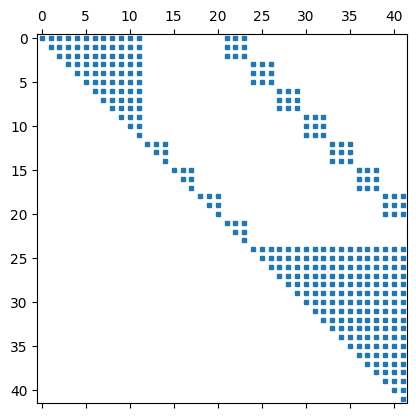

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spy(A_tilde, markersize=3)
plt.show()

In Notebook 4 we will discuss the meaning and the importance of the sparsity pattern.

## Solve with a Classical Solver

Analog to (QCIO) we can use a classical solver to solve (QUBO). In the next cells we do this for our `qubo` from above.

In [31]:
qubo_minimization_result = cplex_optimizer.solve(qubo)

print("minimum point (binary): b_min = ", qubo_minimization_result.x)
print("minimum value: f_3(b_min) = ", qubo_minimization_result.fval)

minimum point (binary): b_min =  [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
minimum value: f_3(b_min) =  57.999999999999886


The array `qubo_minimization_result.x` corresponds to a solution $\vec{b}_\text{min}$ of (QUBO). With the method `interpret` of `converter` we can transform the binary vector $\vec{b}_\text{min}$ to the integer vector $\vec{p}_\text{min}$ (which is a feasible solution of (QCIO) if $\varrho$ was chosen large enough).

In [32]:
b_min = qubo_minimization_result.x
p_min = converter.interpret(b_min)

print("minimum point (integer): p_min = ", p_min)
print("minimum value: f_1(p_min) = ", qcio.objective.evaluate(p_min))
print("minimum point feasible = ", qcio.is_feasible(p_min))

minimum point (integer): p_min =  [2. 2. 2. 2. 0. 0. 0. 0. 1. 1. 1. 3. 3. 3.]
minimum value: f_1(p_min) =  58.0
minimum point feasible =  True


Last, let's plot the solution:

In [33]:
fig = plot_charging_schedule(charging_unit, p_min, marker_size=20)
fig.update_layout(width=400, height=300)
fig.show()

# Literature <a class="tocSkip"/>
[1] Karimi, S. and Ronagh, P. 2019. Practical Integer‐to‐Binary Mapping for Quantum Annealers.
Quantum Inf Process 18, 4, 42314. [Link](https://link.springer.com/article/10.1007/s11128-019-2213-x). [Link arxiv](https://arxiv.org/abs/1706.01945)

---
Author: Andreas Sturm, andreas.sturm@iao.fraunhofer.de

(c) Fraunhofer IAO

---

**Copyright 2023 Andreas Sturm, Fraunhofer IAO**

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.